In [1]:
# Importamos la librería psycopg2 para conectarnos a una base de datos PostgreSQL
import psycopg2
# Importamos pandas, que nos permite manipular y analizar datos de manera eficiente
import pandas as pd
## imports 
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from banadih import con_db



In [2]:
codigos = ('M0001', 'M0002', 'M0002', 'M0004', 'M0258', 'M1036', 'M0008', 'M0031')

query = f"""select id_estacion, codigo, punto_obs,latitud, longitud, altitud ,provincia, canton
from administrativo.vta_estaciones where codigo in {codigos} and captor = 'MANUAL'"""

estacion_meta = con_db.query_to_dataframe(query)

# Crear widgets
dropdown = widgets.Dropdown(
    options= estacion_meta['codigo'].unique().tolist(),
    description='Código:'
)
output = widgets.Output()
# Variable para almacenar el filtro
filtro_actual = None
data = None

display(Markdown("<h1 style='color: #0048bd;'>Seleccione una estación de la lista.</h1>"))
# Ejecutar la consulta y almacenar los resultados en un DataFrame
def on_change(change):
    global filtro_actual
    global data
    with output:
        output.clear_output()
        filtro_actual = estacion_meta[estacion_meta['codigo'] == dropdown.value]
        query_precipitacion = f"""select fecha_toma_dato, valor from convencionales._017140801h
        where id_estacion = {filtro_actual.iloc[0,0]} AND fecha_toma_dato BETWEEN '1950-01-01' AND '2024-12-31';"""
        data = con_db.query_to_dataframe(query_precipitacion)
        display(filtro_actual)
        display(Markdown("<h3 style='color: #0048bd;'><strong>Resumen de los datos </strong></h3>"))
        display(pd.to_numeric(data['valor']).describe())
        # También puedes usar filtro_actual en otras partes de tu código

dropdown.observe(on_change, names='value')

# Mostrar widgets
display(dropdown, output)

# Llamar inicialmente para mostrar datos
on_change({'new': dropdown.value})


<h1 style='color: #0048bd;'>Seleccione una estación de la lista.</h1>

Dropdown(description='Código:', options=('M0004', 'M0002', 'M0258', 'M1036', 'M0001', 'M0031', 'M0008'), value…

Output()

In [3]:
print(data)
print(type(data['valor']))

print(pd.to_numeric(data['valor']).describe())

          fecha_toma_dato valor
0     1985-08-26 19:00:00   0.0
1     1968-06-18 07:00:00   0.0
2     1968-06-19 07:00:00   0.2
3     1968-06-20 07:00:00   0.0
4     1968-06-21 07:00:00   0.0
...                   ...   ...
65116 1985-08-21 19:00:00   0.0
65117 1985-08-22 19:00:00   0.0
65118 1985-08-23 19:00:00   0.0
65119 1985-08-24 19:00:00   0.0
65120 1985-08-25 19:00:00   0.0

[65121 rows x 2 columns]
<class 'pandas.core.series.Series'>
count    64151.000000
mean       -12.054598
std        104.713154
min       -888.800000
25%          0.000000
50%          0.000000
75%          0.000000
max         37.000000
Name: valor, dtype: float64


In [4]:
print("aqui algo ")


aqui algo 


In [5]:
# Imports for JupyterLite
%pip install -q ipywidgets matplotlib numpy scipy
%matplotlib inline

from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


Note: you may need to restart the kernel to use updated packages.


Matplotlib created a temporary cache directory at /tmp/matplotlib-n5zo87jx because the default path (/home/jupyter-drosero/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [6]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t


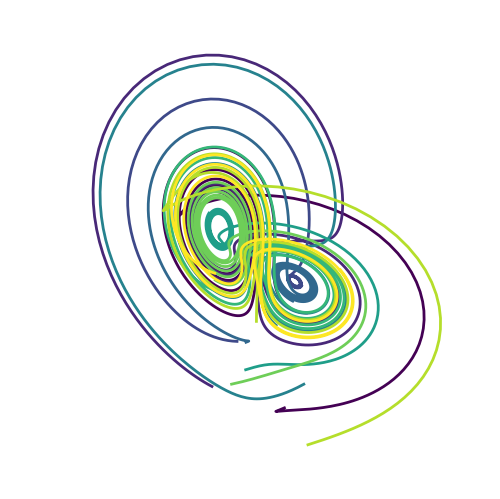

In [7]:
t, x_t = solve_lorenz(angle=0, N=10)

In [8]:
w = interactive(solve_lorenz, angle=(0.,360.), max_time=(0.1, 4.0), 
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

In [9]:
t, x_t = w.result

In [10]:
w.kwargs

{'N': 10,
 'angle': 0.0,
 'max_time': 4.0,
 'sigma': 10.0,
 'beta': 2.6333333333333333,
 'rho': 28.0}

In [11]:
xyz_avg = x_t.mean(axis=1)

In [12]:
xyz_avg.shape

(10, 3)

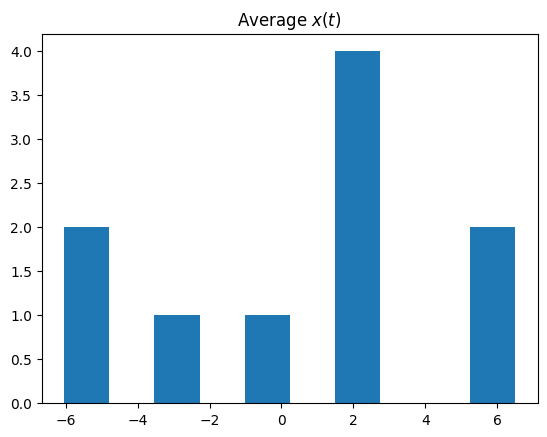

In [13]:

plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');


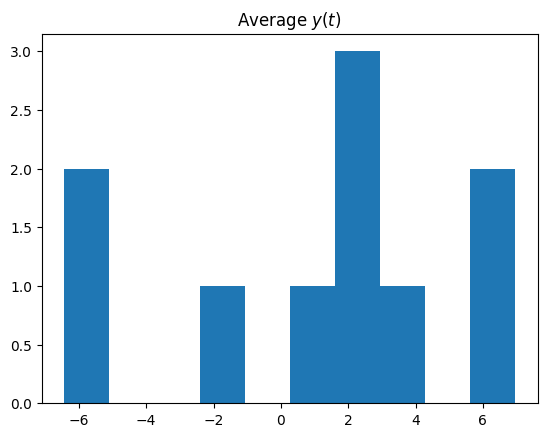

In [14]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');

In [15]:
factorit(12)


NameError: name 'factorit' is not defined

In [16]:

interact(factorit, n=(2,40));

NameError: name 'factorit' is not defined

In [17]:
import sys
print(sys.executable)  # Verificar la ruta del intérprete de Python que se está usando
print(sys.path)

/opt/tljh/user/bin/python
['/opt/tljh/user/lib/python310.zip', '/opt/tljh/user/lib/python3.10', '/opt/tljh/user/lib/python3.10/lib-dynload', '', '/home/jupyter-drosero/.local/lib/python3.10/site-packages', '/opt/tljh/user/lib/python3.10/site-packages']


In [18]:
# Text area variables:
input_description = "Description"
style = {"description_width": "150px"}
layout = widgets.Layout(width="400px")
value = "Enter your value here"

# Button variables:
button_description = "Submit"
button_style = "success"

# Result variables:
result_message = "Your input is:"
# Setup input text widget
text = widgets.Text(
    description=input_description, value=value, style=style, layout=layout
)

# Setup button widget
button = widgets.Button(description=button_description, button_style=button_style)

# Setup HBox to display widget horizontally
Box = widgets.HBox([text, button])

# Setup output
output = widgets.Output()

# Event on click
def save(b):
    output.clear_output()
    with output:
        print(result_message, text.value)


# Display
display(Box, output)
button.on_click(save)

Output()